In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import scipy
import scipy.stats
import scipy.optimize

In [3]:
data = pd.read_csv("/home/benjamin/Masaüstü/DS/tweet_analysis/cleaned_ps_corpus.csv", low_memory=False)

In [20]:
import nltk
from nltk.corpus import stopwords

# stop words
stop_words = set(stopwords.words('english'))

data.tweet = data.tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))



In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200930 entries, 0 to 200929
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user             200930 non-null  object
 1   follows_count    200930 non-null  int64 
 2   friends_count    200930 non-null  int64 
 3   retweet_count    200930 non-null  int64 
 4   date_tweet       200930 non-null  object
 5   number_of_likes  200930 non-null  int64 
 6   tweet_id         200930 non-null  object
 7   tweet            200930 non-null  object
 8   hashtags         122640 non-null  object
 9   year             200930 non-null  int64 
 10  month            200930 non-null  object
 11  day              200930 non-null  object
 12  token_numbers    200930 non-null  int64 
 13  char_numbers     200930 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 21.5+ MB


In [36]:
documents = data['tweet'].tolist()

# Usage

In [22]:
from top2vec import Top2Vec

model = Top2Vec(documents, speed="learn", workers=4)

2022-12-06 00:43:18,173 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-12-06 00:43:24,903 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-12-06 00:48:21,830 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-12-06 00:50:05,351 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-12-06 00:50:15,616 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


# Pretrained Embedding Models

### Get Number of Topics

In [23]:

model.get_num_topics()

3026

### Get Topic Sizes

In [24]:
topic_sizes, topic_nums = model.get_topic_sizes()

### Get Topics

In [25]:
topic_words, word_scores, topic_nums = model.get_topics(10)

### Search Topics

In [26]:

topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["safety","patient"], num_topics=5)

### Generate Word Clouds

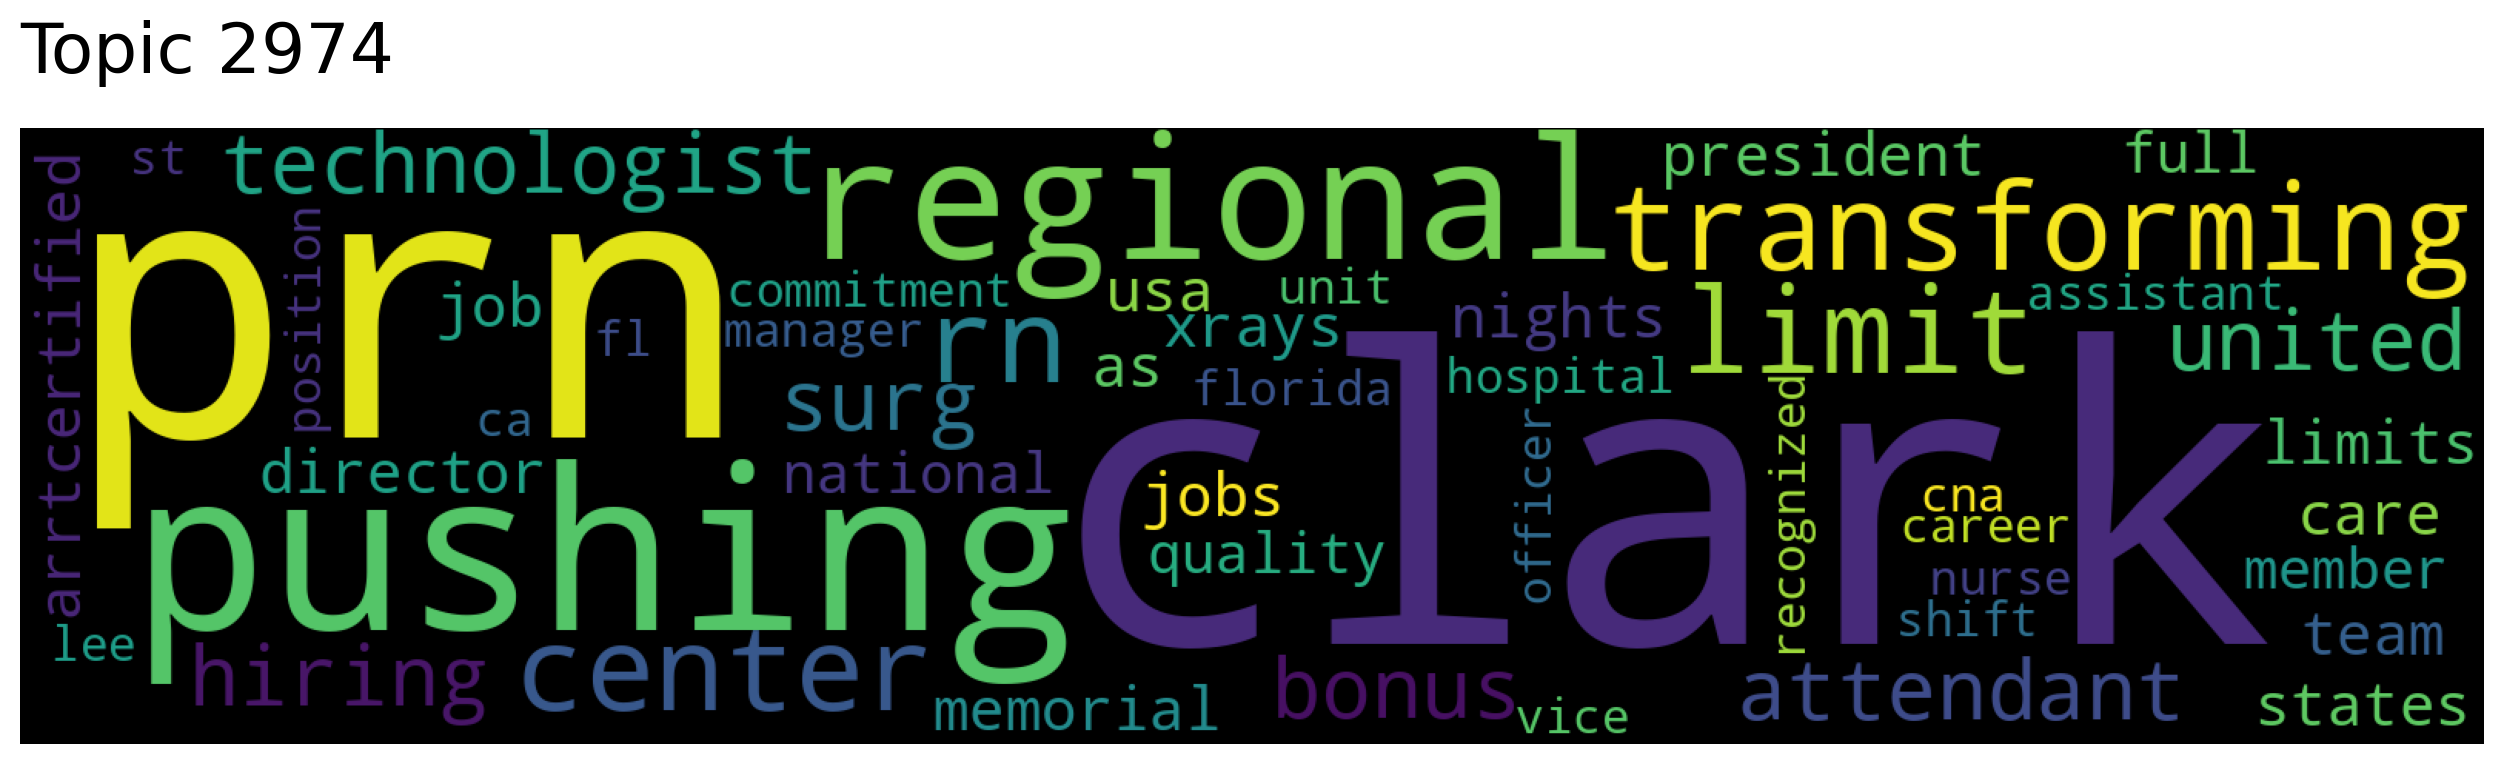

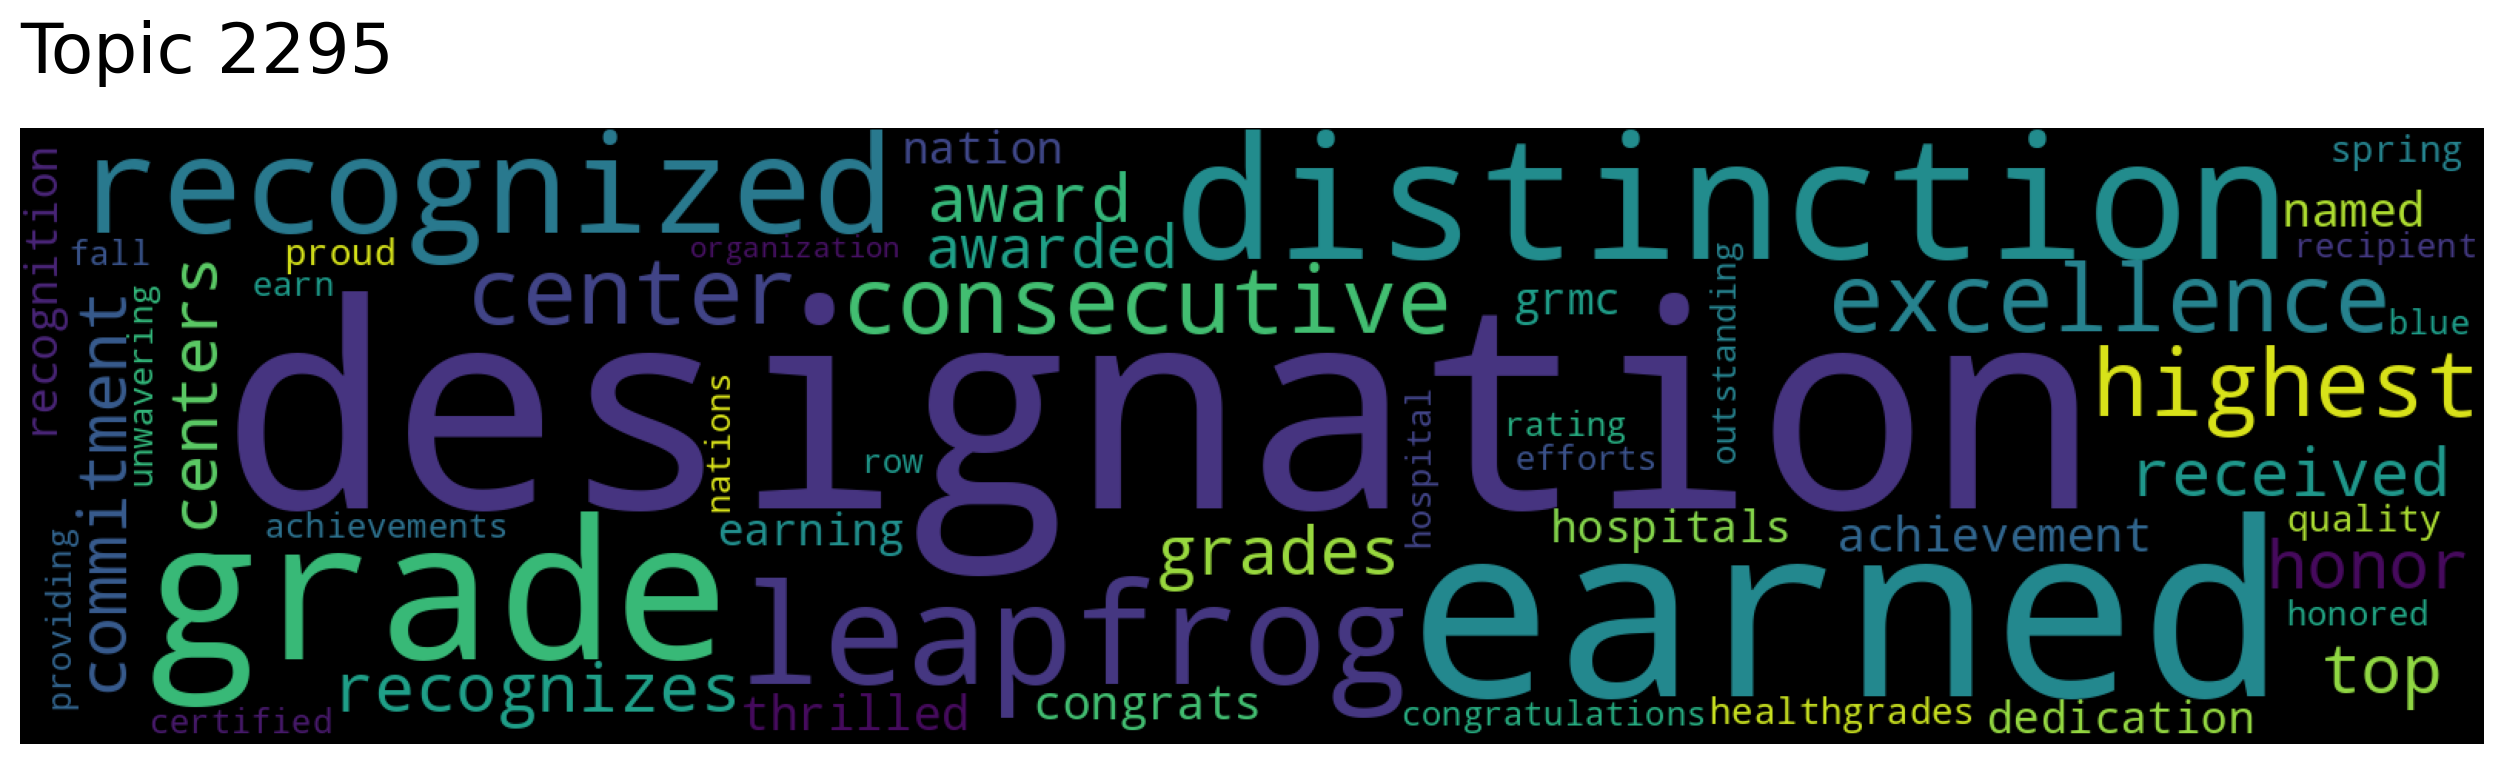

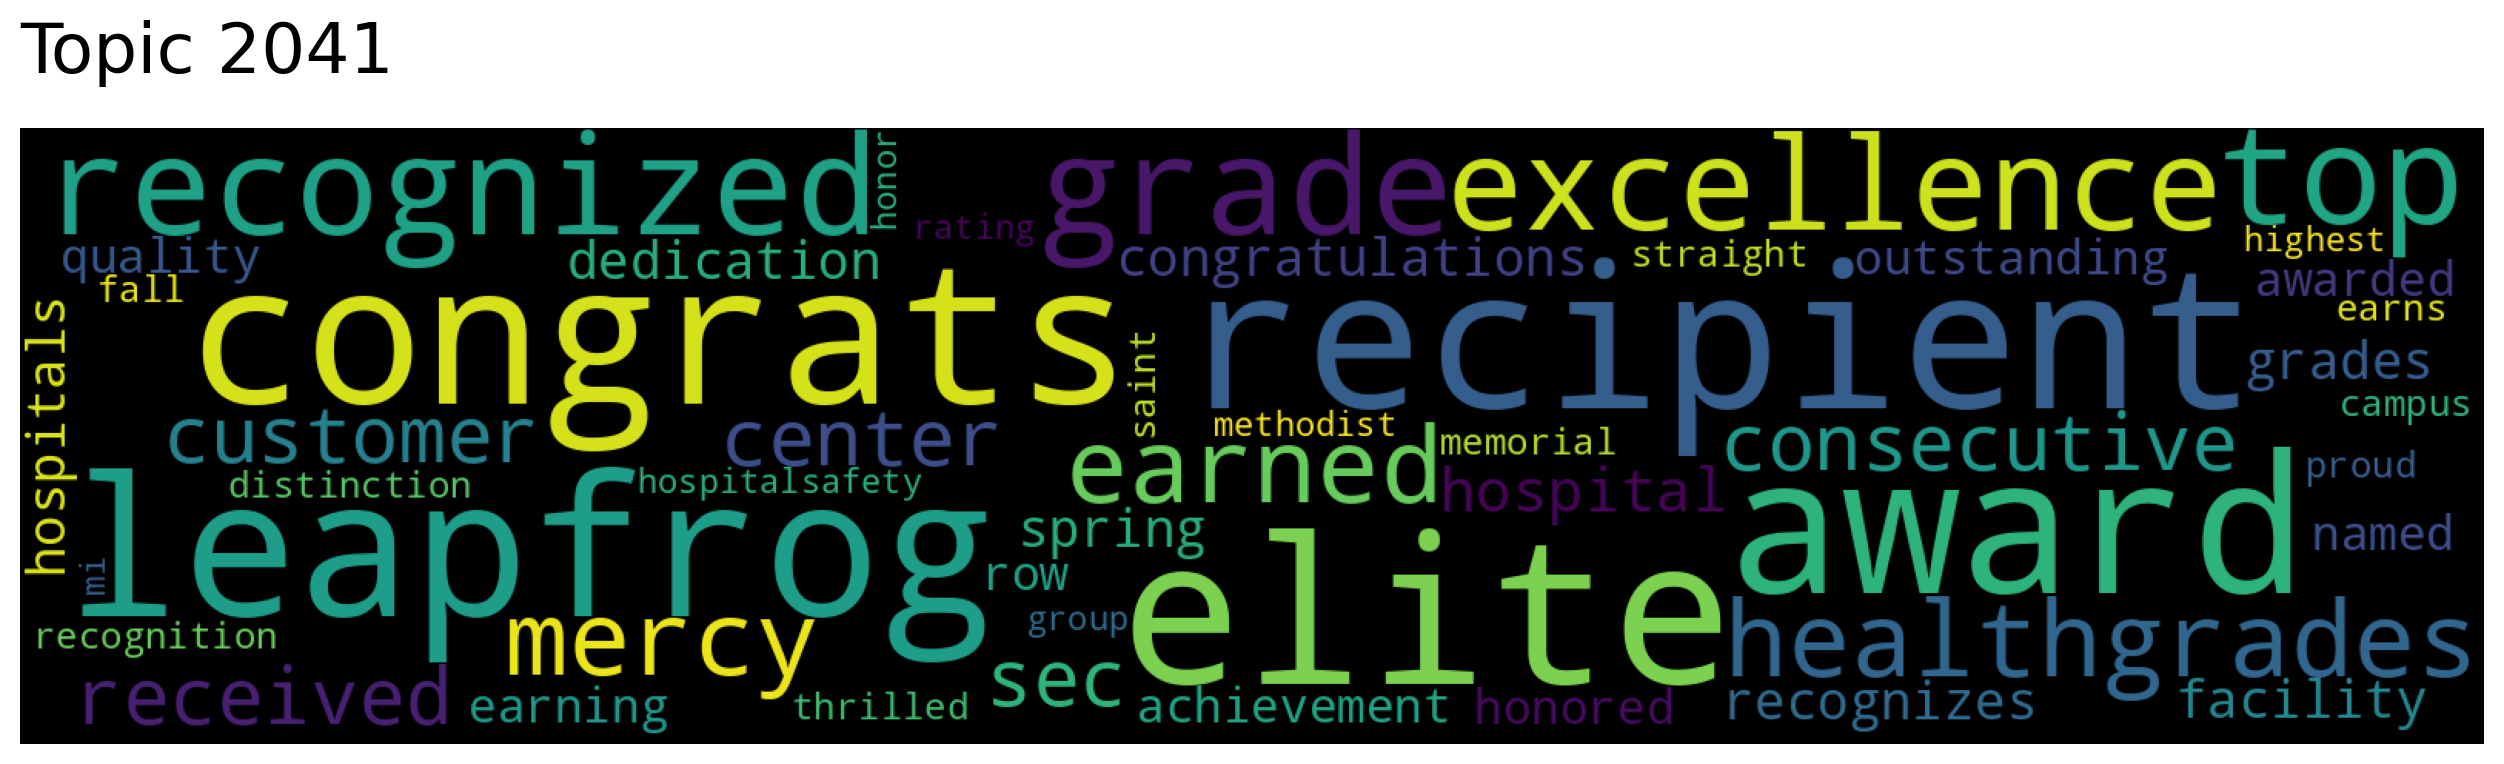

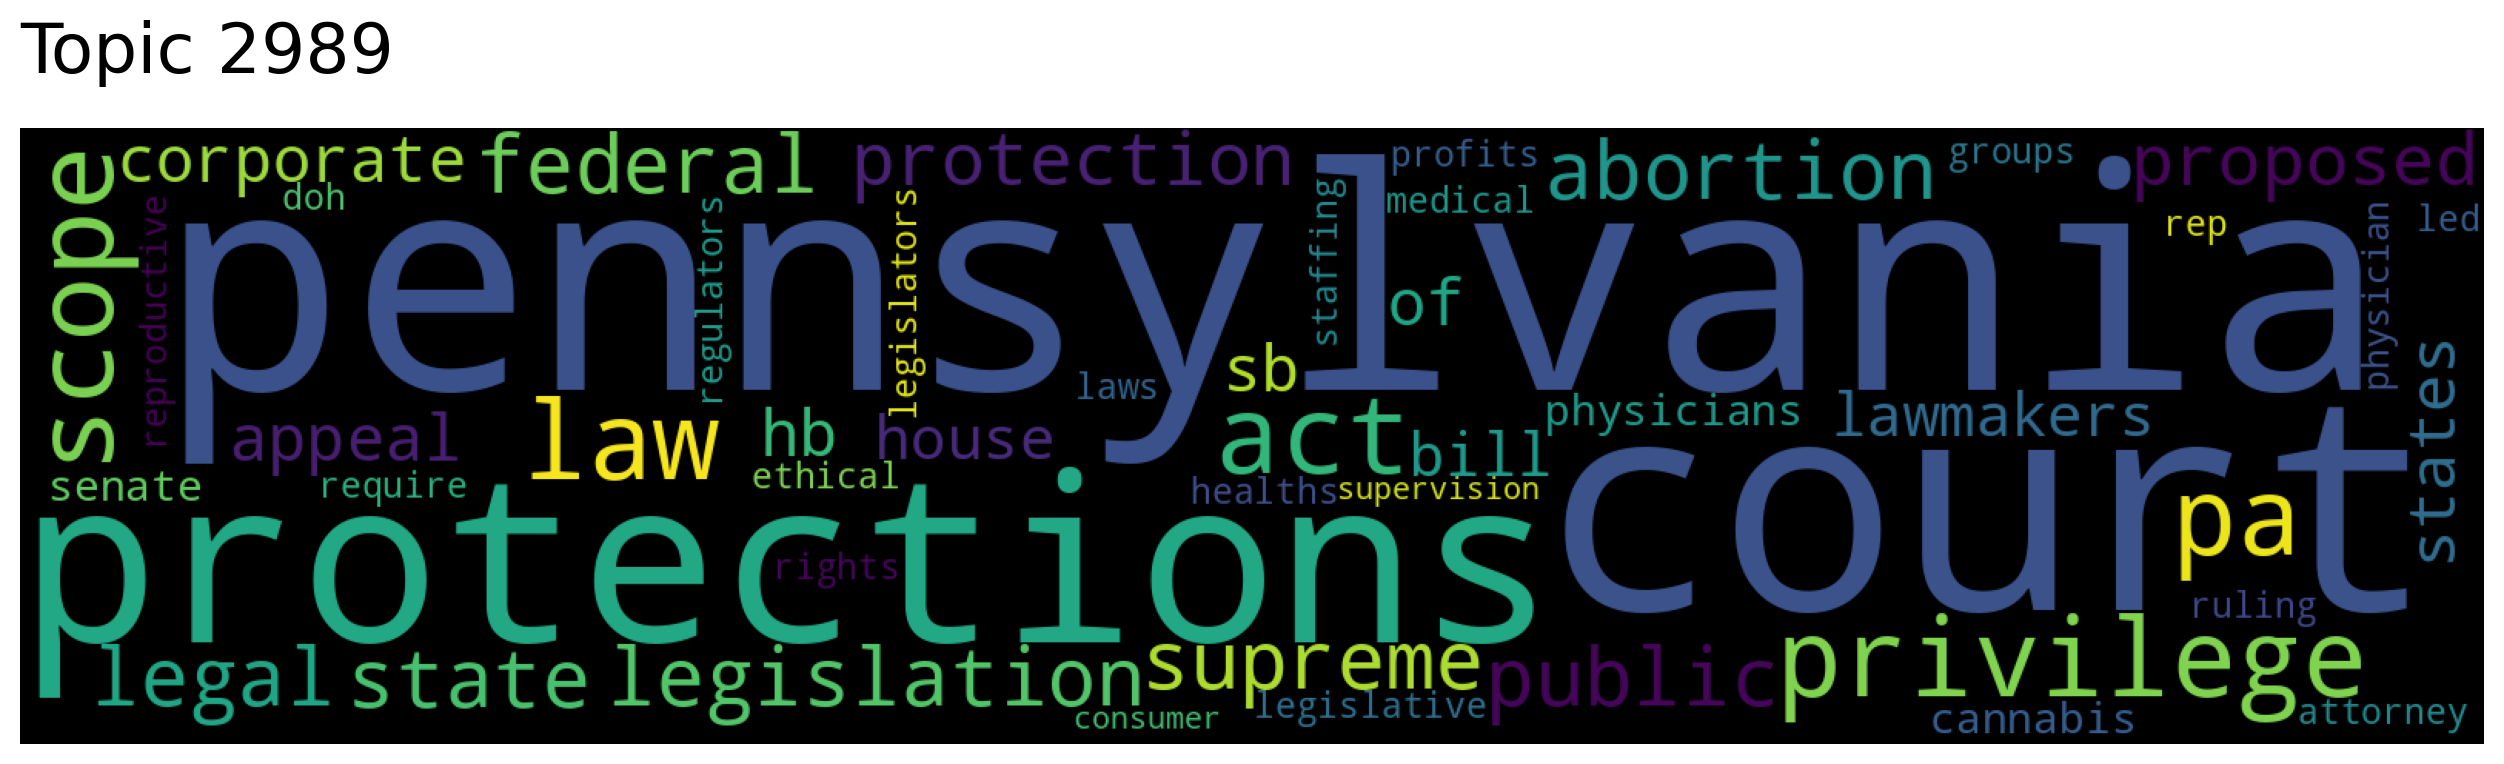

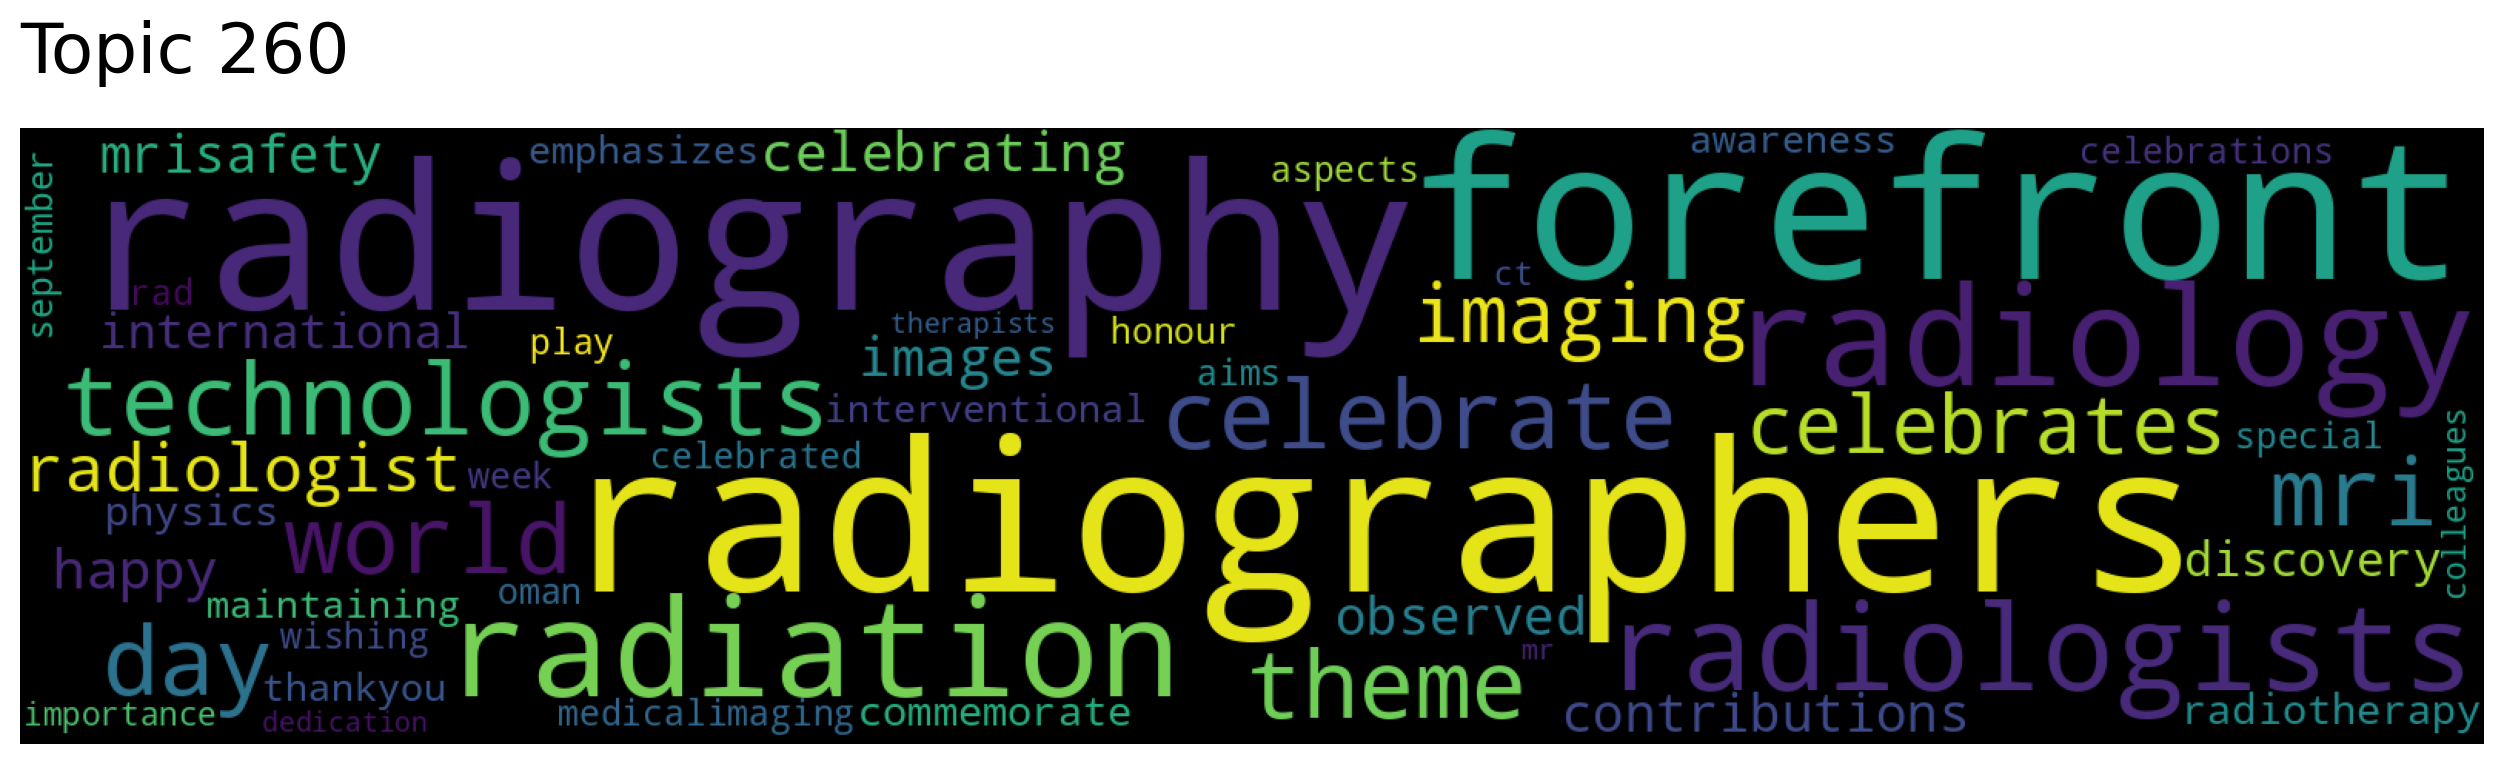

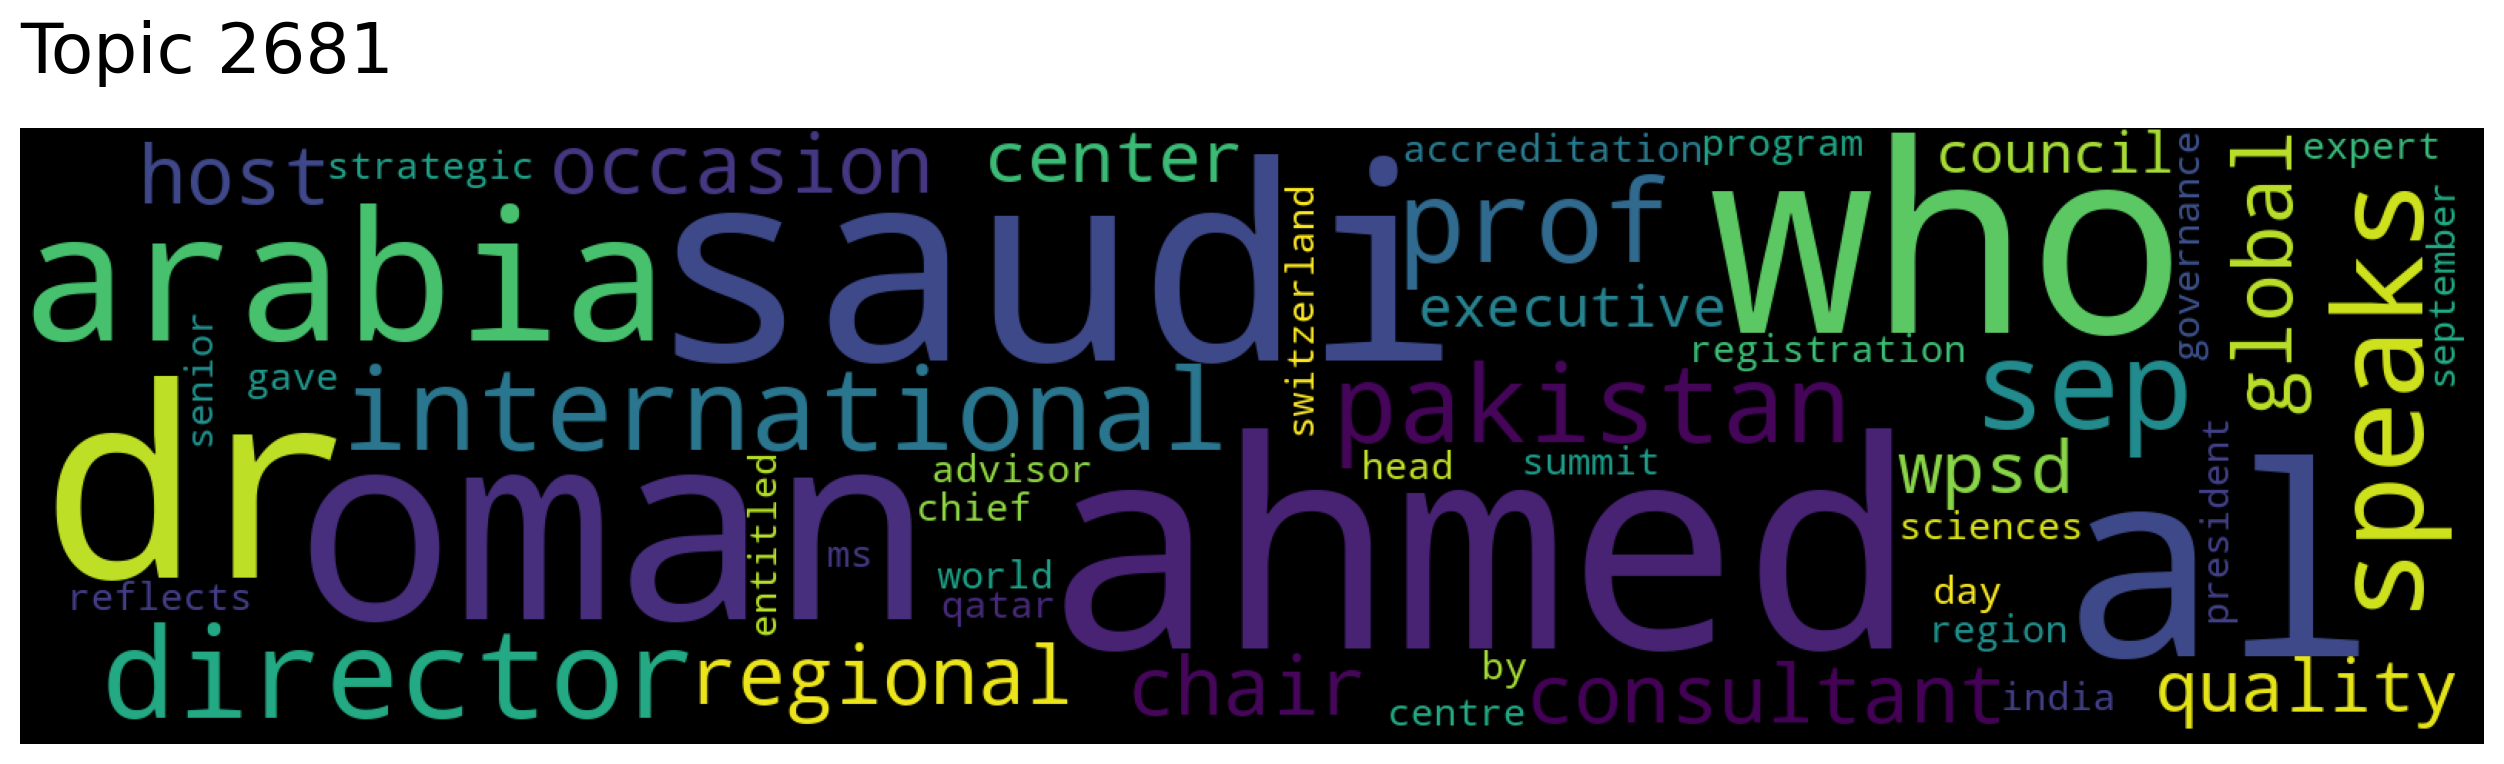

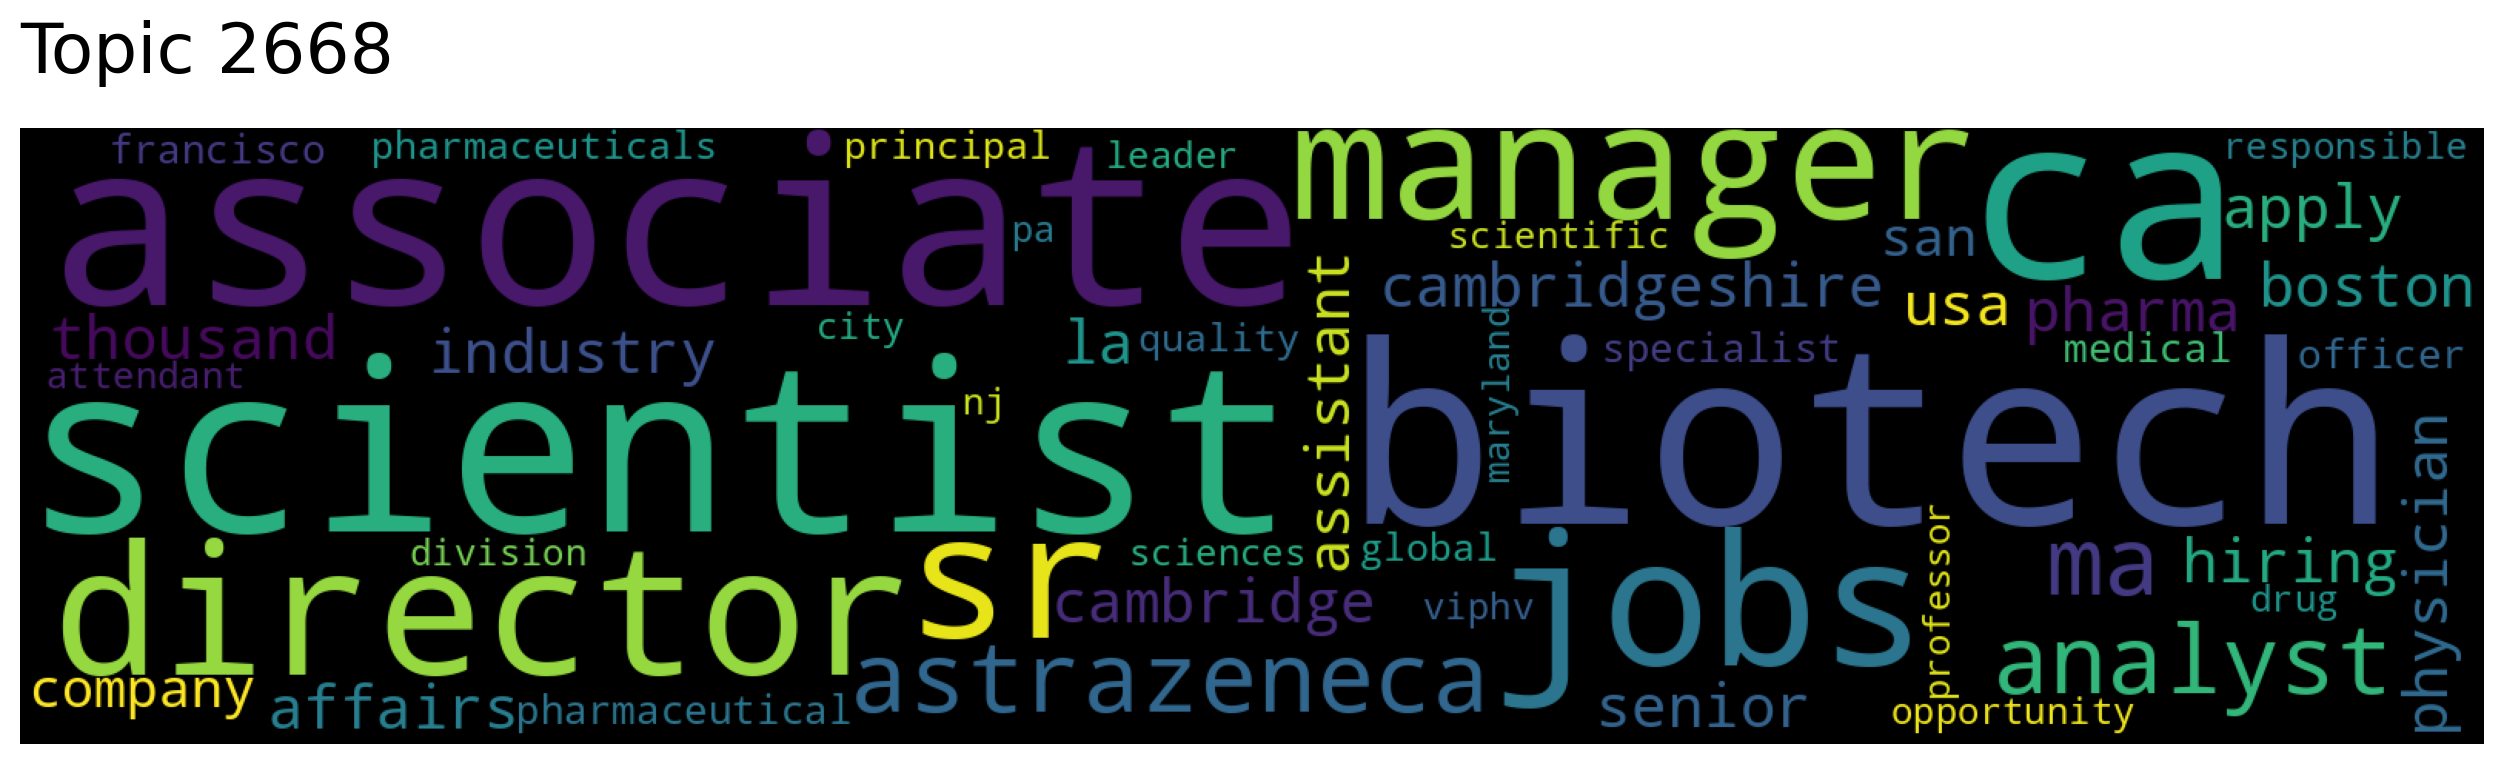

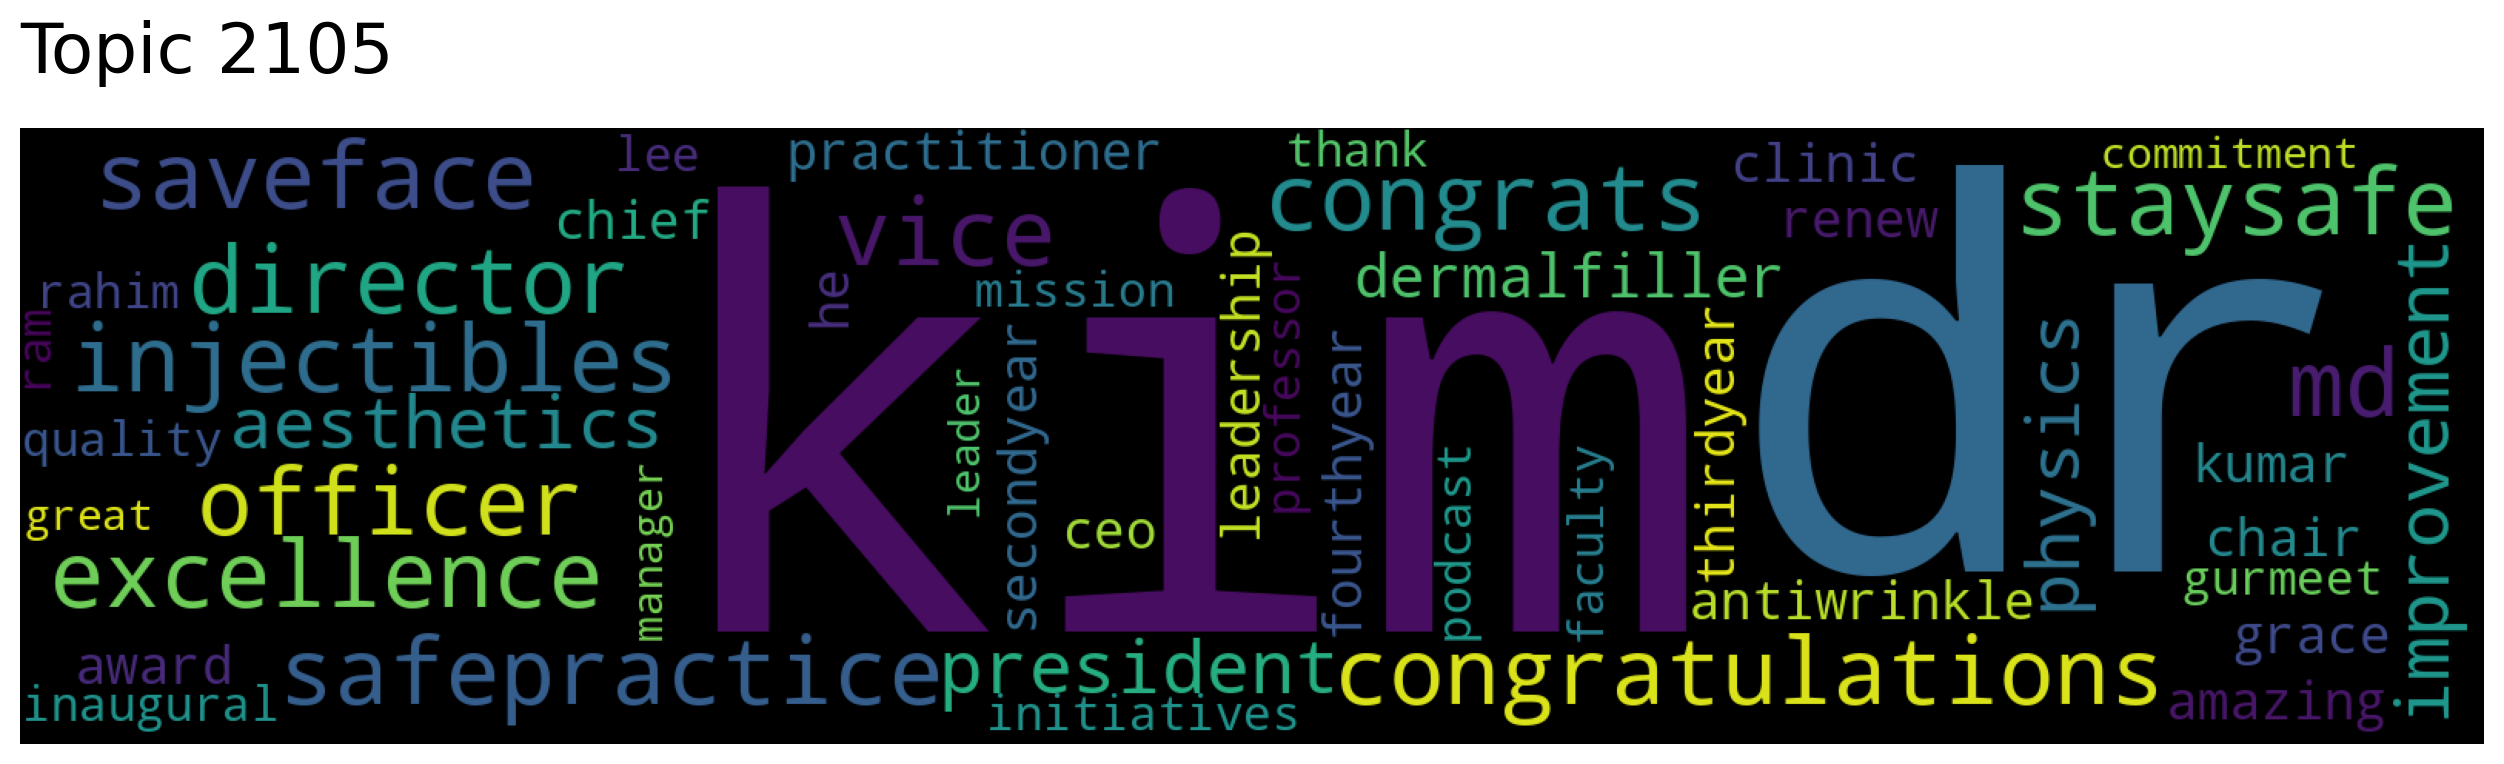

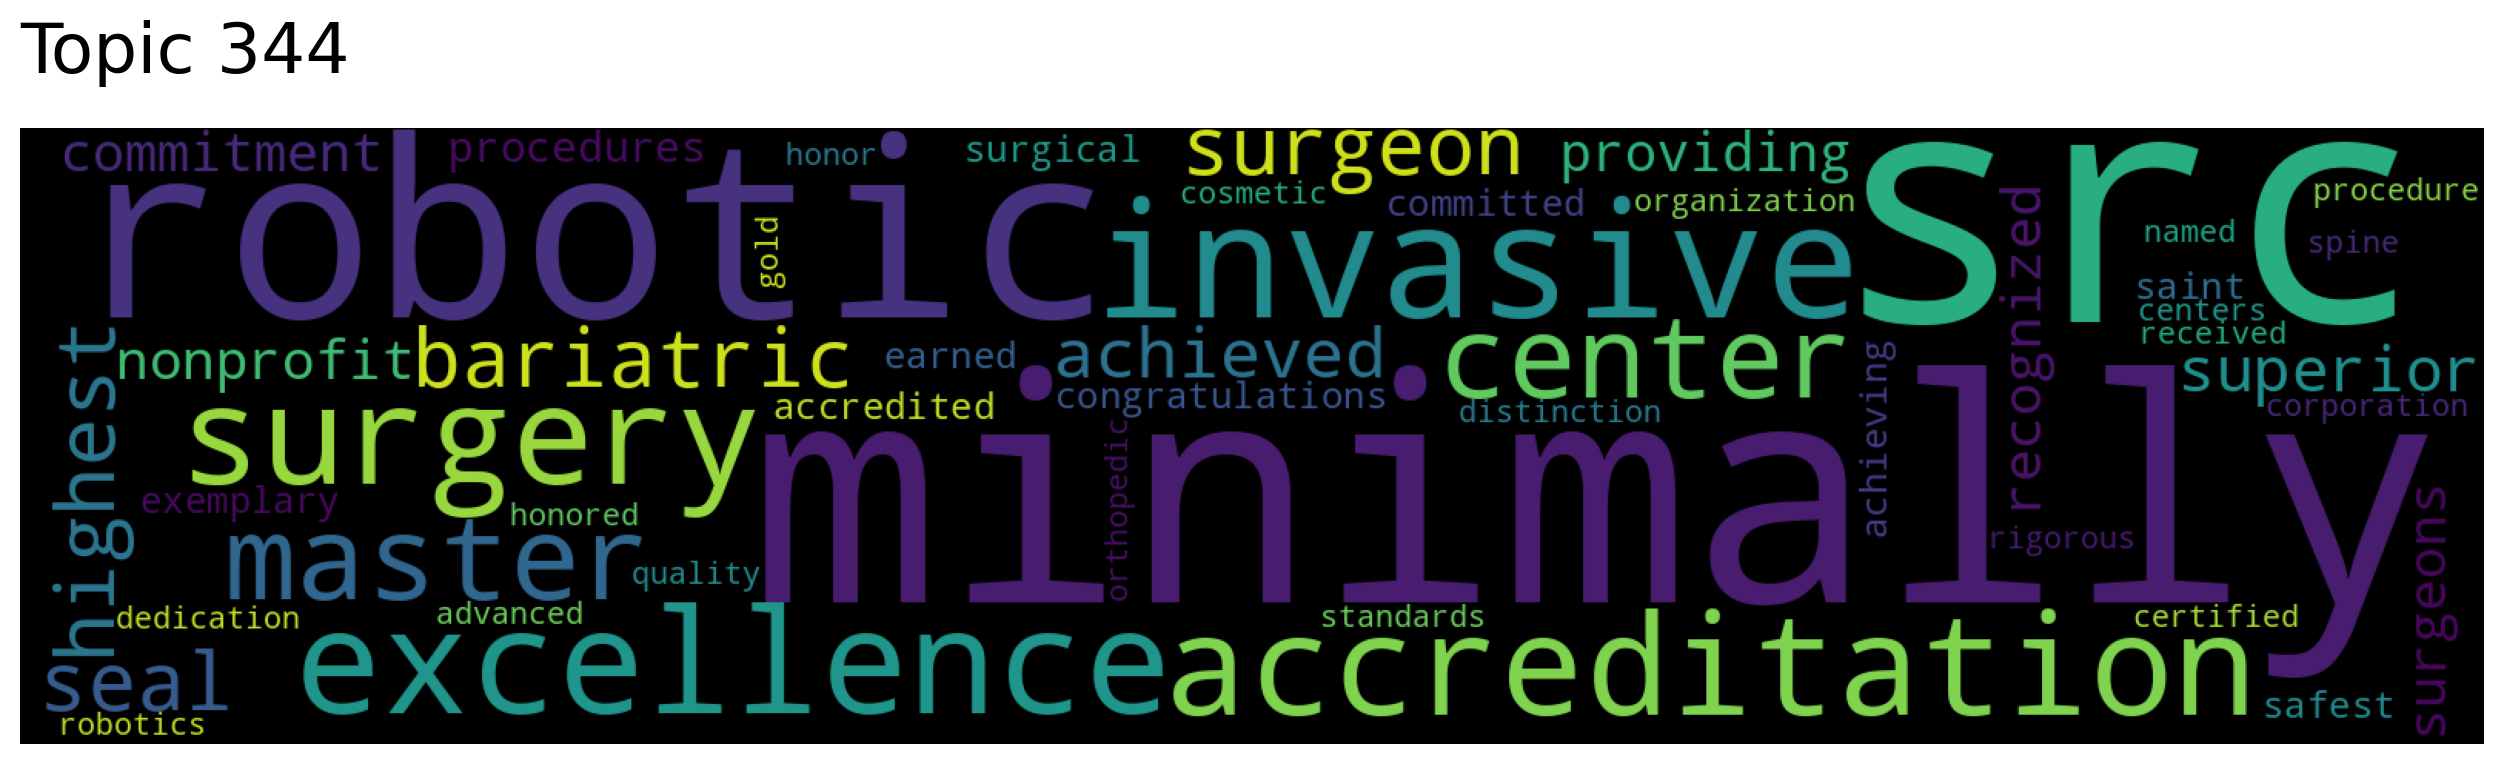

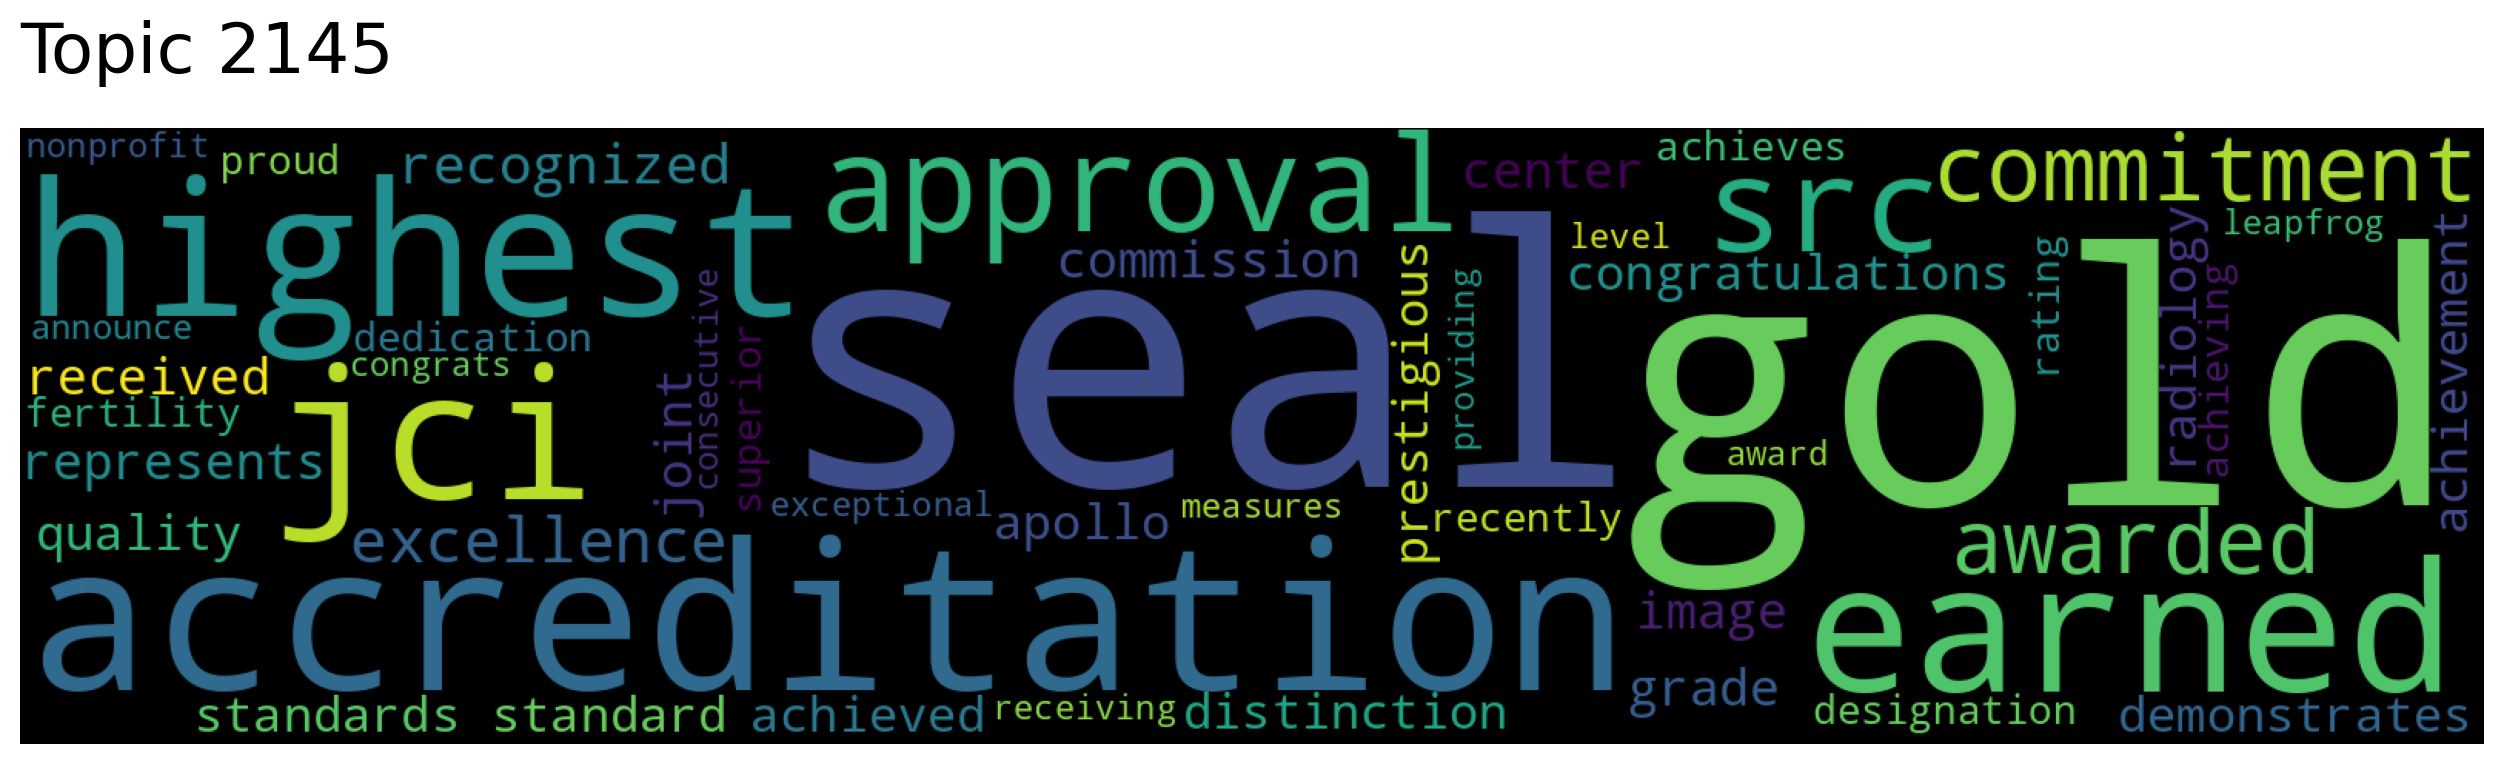

In [28]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["patient","safety"], num_topics=10)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

### Search Documents by Topic

In [31]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=344, num_docs=10)

In [32]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=344, num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 193460, Score: 0.8652395606040955
-----------
SRC congratulates Dr. Catalin Marinescu achieving accreditation #MasterSurgeon Minimally Invasive Gynecology Surgeon Excellence Robotic Surgery. He prides zero complications procedures. #patientsafety
-----------

Document: 191902, Score: 0.8518723249435425
-----------
Congratulations accreditation Surgical Review Commission Surgeon Excellence Minimally Invasive Gynecology Robotic Surgery. The SRC non-profit dedicated #patientsafety #gynecologic #cancer
-----------

Document: 102101, Score: 0.8446913361549377
-----------
Congratulations weeks SRC designees: -Ponderas Academic Hospital Center Excellence Minimally Invasive Surgery since 2017 - Saint Joseph East Hospital Center Excellence Robotic Surgery #src #accreditation #patientsafety 2/3
-----------

Document: 30233, Score: 0.8323803544044495
-----------
Dr. Arpeet Shah recently achieved accreditation #SRC South Suburban Hospital. Dr. Shah recognized #SurgeonofExcellence Minimal

### Semantic Search Documents by Keywords

In [33]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["safety", "patient"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 7197, Score: 0.2655547261238098
-----------
World Radiography Day 2022 Radiographers Forefront Patient Safety #RadiographyDay #DepartmentOfRadiology #HAMSHospital #ProvidingQualityAndAffordableHealthcare
-----------

Document: 7207, Score: 0.26324164867401123
-----------
World Radiography Day Radiographers forefront patient safety #WorldRadiologyDay #WorldRadiographyDay #radiography #radiology
-----------

Document: 131558, Score: 0.2575848400592804
-----------
Congratulations Stewards Saint Annes Hospital Fall River, MA straight A Leapfrog grade patient safety performance
-----------

Document: 30423, Score: 0.2531549334526062
-----------
Join us upcoming webinar: #PatientSafety Health Worker Retention - Twin Crises hosted Aug 23 Nancy Foster
-----------

Document: 7176, Score: 0.24803034961223602
-----------
Selamat Hari Radiografi Sedunia Tahun 2022 Radiographers forefront patient safety #WorldRadiographyDay2022 #salamsehat #salambarigas #tetapjagaprokes #RSMAKasongan
----

### Similar Keywords

In [34]:
words, word_scores = model.similar_words(keywords=["safety"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

patient 0.8441449286766763
the 0.73547694004816
this 0.7057103938396767
also 0.7021711583077941
it 0.6941723420906225
in 0.6939904071505314
we 0.6811377051118097
would 0.6719376579122216
care 0.665727144022487
way 0.6640268936314405
first 0.6582925418595973
one 0.6556289865434441
need 0.6551473352225061
medical 0.6502525183619321
you 0.6466331932367972
new 0.6404629048635773
quality 0.6380162217381747
but 0.637387183262915
including 0.6363208945239643
there 0.6358536599362269
